In [1]:
import numpy as np
#머신러닝에서 사용하는건데, anaconda에 기본적으로 깔려있다.
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from tensorflow.keras.datasets import imdb
from konlpy.tag import Twitter
from konlpy.tag import Okt
from konlpy.tag import Kkma 
from konlpy.tag import Twitter
from pprint import pprint
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
from wordcloud import WordCloud, STOPWORDS
from gensim import corpora, models
import numpy  as np
from PIL import Image
from wordcloud import ImageColorGenerator
import glob
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\student\Anaconda3\envs\py36\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\student\Anaconda3\envs\py36\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: 지정된 모듈을 찾을 수 없습니다.

During handling of the above exception, another exception 

TypeError: must be str, not list

In [2]:
ko_str = '이것은 한국어 문장입니다.'
ja_str = 'これは日本語の文章です。'
en_str = 'This is English Sentences.'
ch_str = '统一码'

In [3]:
print(ko_str[1])

것


In [4]:
#ord : 아스키 코드값을 가져온다.
#기본적으로 어느나라 언어인지, 캐릭터(문자)의 범위가지고, 알 수 있어서, 유추가 가능하다.
print(ord(ko_str[0]))
print(ord(ja_str[0]))
print(ord(en_str[0]))
print(ord(ch_str[0]))

51060
12371
84
32479


In [5]:
#각각의 언어마다, 문자의 빈도수가 다르다.
#유니코드는 0부터 65536까지
# Unicode 코드 포인트로 출현 빈도 판정하기 --- (*1)
def count_codePoint(str):
    # Unicode 코드 포인트를 저장할 배열 준비하기 --- (*2)
    counter = np.zeros(65535)
    for i in range(len(str)):
        # 각 문자를 Unicode 코드 포인트로 변환하기 --- (*3)
        code_point = ord(str[i])
        if code_point > 65535 :
            continue
        # 출현 횟수 세기 --- (*4)
        counter[code_point] += 1

    # 각 요소를 문자 수로 나눠 정규화하기 --- (*5)
    counter = counter/len(str)
    return counter
    

In [6]:
# 학습 전용 데이터 준비하기
ko_str = '이것은 한국어 문장입니다.'
ja_str = 'これは日本語の文章です。'
en_str = 'This is English Sentences.'

x_train = [count_codePoint(ko_str), count_codePoint(ja_str), count_codePoint(en_str)]
y_train = ['ko','ja','en']

In [7]:
print(x_train[0]) #[0]이므로, 한국어만
print(np.where(x_train[0]>0)) #0이 아닌곳의 인덱스를 출력, 한글은 음절 단위로 모두 기록되어 있다.

idx = np.where(x_train[0]>0)

data = x_train[0]
print(data[idx]) #발생빈도수가, 0보다 큰것들의 빈도수를 표시

[0. 0. 0. ... 0. 0. 0.]
(array([   32,    46, 44163, 44397, 45768, 45796, 47928, 50612, 51008,
       51060, 51077, 51109, 54620], dtype=int64),)
[0.14285714 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857]


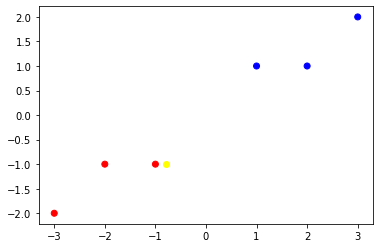

In [53]:
#그냥 이건 위의것과 상관 없음, 이해를 위해서
import matplotlib.pyplot as plt
#X = np.array([[-1, -1], [3, 2]])
#Y = np.array([1,  2])
#데이터가 별로 없어서, 딥러닝은 힘들다. 풀어봤자, 풀리지 않는다. 샘플개수 3개다.

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

#빨간색이 1, 파란색이 2
#Y = np.array([1, 1, 1, 2, 2, 2])
#이렇게 줘도 된다.
Y = np.array(['r', 'r', 'r', 'b', 'b', 'b'])

#color = [ 'red' if y == 1 else 'blue' for y in Y]
color = [ 'red' if y == 'r' else 'blue' for y in Y]

#X[np.array의 전체 괄호의 0번 인덱스, 1번 인덱스]
plt.scatter(X[:, 0], X[:, 1], color=color)

t = np.array([[-0.8, -1]]) #테스트 데이터

plt.scatter(t[:,0], t[:,1], color='yellow')

In [55]:
clf = GaussianNB() #특정 조건이 주어졌을때, 확률값을 가져가는것
clf.fit(X, Y)
#Y는 같은 애들인지 아닌지 구분하기 위해서이지, 연산에 활용하지는 않는다.

#-0.8, -1에 해당하는 애들이 어디라고 예측하는가?
#똑같은것
print(clf.predict([[-0.8, -1]]))
print(clf.predict(t))

#언어에서는 데이터 3개에 65536차원이 된다. 행 3개, 열 65536

['r']


In [17]:
#데이터가 적을 때, 가장 단순하게 사용할 수 있는 알고리즘
clf.fit([[0,0], [0,1], [1,0], [1,1]], [0,1,1,0])
print(clf.predict([[0, 1]]))

[0]


In [20]:
#학습하기 
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
########0 ~ 65536까지 아스키코드의 분포를 파악하여, 어느 나라 언어인지 파악한다.
y_pred = clf.predict([count_codePoint('안녕, 어디야')])
print(y_pred)

['ja']


In [38]:
# 평가 전용 데이터 준비하기
en_test_str = 'Hello'
ja_test_str = 'こんにちは'
ko_test_str = '안녕, 어디야?'

x_test = [count_codePoint(en_test_str), count_codePoint(ja_test_str), count_codePoint(ko_test_str)]
y_test = ['en', 'ja', 'ko']

# 평가하기 --- (*7)
y_pred = clf.predict(x_test)
print(y_pred) #예측
print(y_test) #정답
print("정답률 = " , accuracy_score(y_test, y_pred))

['en' 'ja' 'ko']
['en', 'ja', 'ko']
정답률 =  1.0


<h1>문자셋이 동일한 경우?</h1>

<h2>알파벳을 쓰는 국가들은, 알파벳 빈도수로 구분을 한다.</h2>

In [81]:
#언어 하나당 하나의 파일로 구분되어 있다.
# 학습 데이터 준비하기 --- (*1)
x_train = []
y_train = []
for file in glob.glob('./train/*.txt'):
    # 언어 정보를 추출하고 레이블로 지정하기 --- (*2)
    print(file)
    y_train.append(file[8:10]) #전체 경로 명에서 8번째에서 9번째까지 가져오라는 의미 
    
    # 파일 내부의 문자열을 모두 추출한 뒤 빈도 배열로 변환한 뒤 입력 데이터로 사용하기 --- (*3)
    file_str = ''
    for line in open(file, 'r', encoding='UTF8'):
        #전체 문장을 하나의 문자열로 변환
        file_str = file_str + line
    # 학습 데이터 준비하기 --- (*1)
    x_train.append(count_codePoint(file_str))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-81-5b0a7730b6b1>", line 5, in <module>
    for file in glob.glob('./train/*.txt'):
NameError: name 'glob' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 2034, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File 

NameError: name 'glob' is not defined

In [58]:
# 학습하기
clf = GaussianNB() 
clf.fit(x_train, y_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-58-01e10f6b444f>", line 3, in <module>
    clf.fit(x_train, y_train)
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\sklearn\naive_bayes.py", line 208, in fit
    sample_weight=sample_weight)
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\sklearn\naive_bayes.py", line 359, in _partial_fit
    X, y = check_X_y(X, y)
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py", line 755, in check_X_y
    estimator=estimator)
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py", line 556, in check_array
    "if it contains a single sample.".format(array))
ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [59]:
y_pred = clf.predict([count_codePoint('hello. my name is ')])
print(y_pred)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-59-baf6072bb6ea>", line 1, in <module>
    y_pred = clf.predict([count_codePoint('hello. my name is ')])
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\sklearn\naive_bayes.py", line 75, in predict
    check_is_fitted(self)
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py", line 967, in check_is_fitted
    raise NotFittedError(msg % {'name': type(estimator).__name__})
sklearn.exceptions.NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactives

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [60]:
# 평가 데이터 준비하기 --- (*4)
x_test = []
y_test = []
for file in glob.glob('./test/*.txt'):
    # 언어 정보를 추출하고 레이블로 지정하기
    y_test.append(file[7:9])
    
    # 파일 내부의 문자열을 모두 추출한 뒤 빈도 배열로 변환한 뒤 입력 데이터로 사용하기
    file_str = ''
    for line in open(file, 'r', encoding='UTF8'):
        file_str = file_str + line
    x_test.append(count_codePoint(file_str)) 

# 평가하기
y_pred = clf.predict(x_test)
print(y_pred)
print("정답률 = " , accuracy_score(y_test, y_pred))  
        

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-60-63c8c217ec55>", line 4, in <module>
    for file in glob.glob('./test/*.txt'):
NameError: name 'glob' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 2034, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\student\Anaconda3\envs\py36\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "

NameError: name 'glob' is not defined